In [4]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

directory = 'deepseekcoder6.7/'

models = ["evaluation_compareeval_deepseek-coder-6-7b-instruct", "evaluation_compareeval_deepseek-coder-explain-6-7b-instruct", "evaluation_compareeval_deepseek-coder-compare-6-7b-instruct"]
file_names = []
for model in models:
    file_names.append(model)
print(file_names)

['evaluation_compareeval_deepseek-coder-6-7b-instruct', 'evaluation_compareeval_deepseek-coder-explain-6-7b-instruct', 'evaluation_compareeval_deepseek-coder-compare-6-7b-instruct']


In [5]:
metrics = []
for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
            
            # Extract the "bleu" value
            try:
                bleu = data.get('compareeval', {}).get('bleu')
                if bleu is not None:
                    print(f"{file_name}: bleu = {bleu}")
                    metrics.append(bleu)
                else:
                    print(f"{file_name}: 'bleu' key not found.")
            except json.JSONDecodeError:
                print(f"{file_name}: Error decoding JSON.")
    else:
        print(f"{file_name}: File not found.")
        
print(metrics)

evaluation_compareeval_deepseek-coder-6-7b-instruct: bleu = 0.0015692343654923782
evaluation_compareeval_deepseek-coder-explain-6-7b-instruct: bleu = 0.002921401491969391
evaluation_compareeval_deepseek-coder-compare-6-7b-instruct: bleu = 0.004872394639797667
[0.0015692343654923782, 0.002921401491969391, 0.004872394639797667]


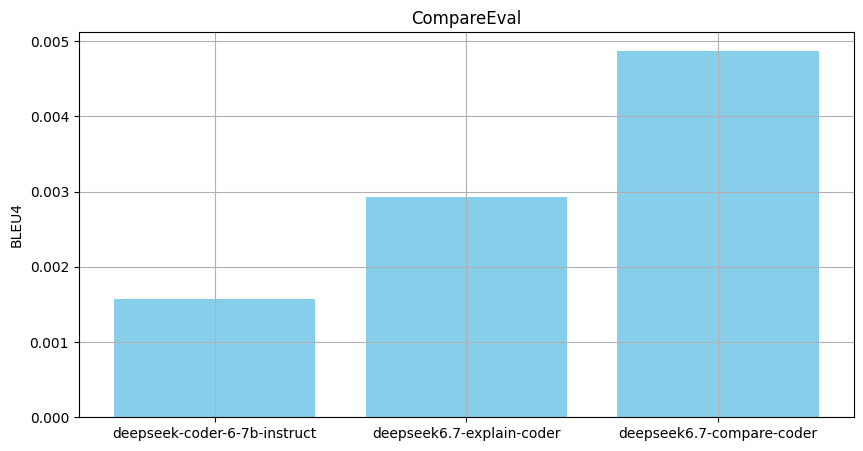

In [6]:
xticks_positions = [1.5, 2.5, 3.5]

model_names = ["deepseek-coder-6-7b-instruct", "deepseek6.7-explain-coder", "deepseek6.7-compare-coder"]
    
    
plt.figure(figsize=(10, 5))
plt.bar(model_names, metrics, color=['skyblue'])
plt.title('CompareEval')
plt.xlabel('')
plt.ylabel('BLEU4')
plt.grid(True)
plt.savefig("figures/compareeval")
plt.show()